### Transforming the data - (to eliminate trend)

<AxesSubplot:xlabel='Date'>

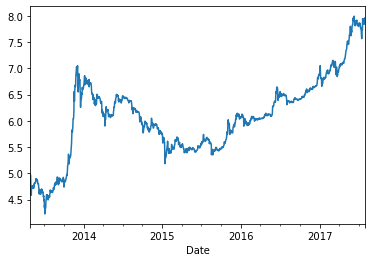

In [117]:
## as we have very high values, apply log transformation on data
log_data=np.log(data['Close'])
log_data.plot()

In [118]:
log_data

Date
2017-07-31    7.963926
2017-07-30    7.921964
2017-07-29    7.910756
2017-07-28    7.940587
2017-07-27    7.890500
                ...   
2013-05-02    4.655958
2013-05-01    4.762088
2013-04-30    4.934474
2013-04-29    4.973556
2013-04-28    4.899406
Name: Close, Length: 1556, dtype: float64

In [119]:
Rolling_average=log_data - log_data.shift(7)

In [120]:
Rolling_average

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.068505
2013-05-01    0.029669
2013-04-30    0.220449
2013-04-29    0.252382
2013-04-28    0.146592
Name: Close, Length: 1556, dtype: float64

### Smoothening your series to remove Seasonality factor
    smoothing is basically done by Moving Avearge..
    Applications of Moving Average-->> 
    extensively used in Stock Market Analysis as well as in Some business as well
    
    In MA,we use Rolling..
    Rolling is just like a rolling 5 days, rolling 6 days, rolling 7 days
    window  & in business its a window that we have considered for Moving average

In [121]:
import matplotlib.pyplot as plt

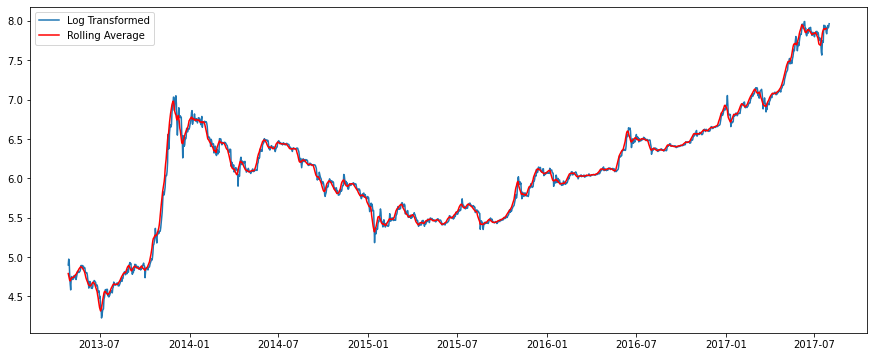

In [122]:
Rolling_average =log_data.rolling(window = 7).mean()
plt.figure(figsize=(15,6))
plt.plot(log_data, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

    The red line shows the rolling mean. Note that since we are taking average of last 7 values, rolling mean is not defined for first 7 values. 

    Lets subtract this Rolling average this from the original log transformed series.

In [123]:
lr_diff=log_data-Rolling_average

In [124]:
lr_diff

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.041435
2013-05-01    0.060456
2013-04-30    0.201349
2013-04-29    0.204377
2013-04-28    0.109284
Name: Close, Length: 1556, dtype: float64

In [125]:
lr_diff=lr_diff.dropna()

ADF Test Statistic: -7.188887202324541 
p-value: 2.5340955586102206e-10 
#Lags Used: 22 
Number of Observations Used: 1527 
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


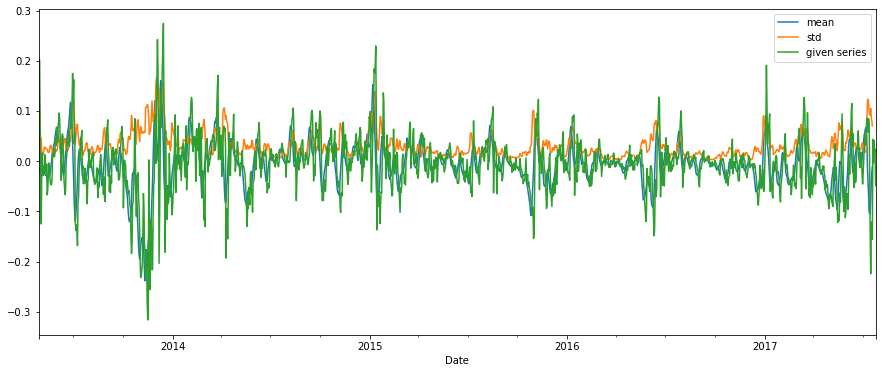

In [126]:
test_for_stationerity(lr_diff)

### Seasonality Adjustment by Differencing

In [127]:
log_ts=log_data-log_data.shift(7)

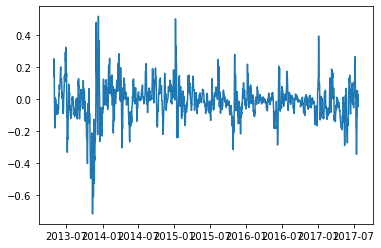

In [128]:
plt.plot(log_ts)

ADF Test Statistic: -6.511722596316715 
p-value: 1.0961860829580395e-08 
#Lags Used: 23 
Number of Observations Used: 1525 
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


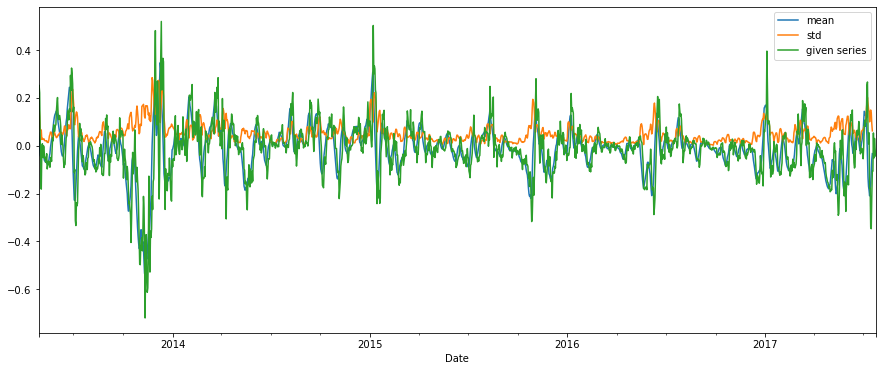

In [129]:
test_for_stationerity(log_ts.dropna())

    The Dickey-Fuller test stats is very much less than 1% critical value than in the previous case. We can say that the Time series is stationary with 99% confidence